In [1]:
PROJECT_PATH = "C:/Users/Thierry/Desktop/ProjetInterPromo/ProjectInterPromo/"
"""
Created on Mon Jan 10 11:02:55 2022
Group 2
@authors: L-A C
"""

'\nCreated on Mon Jan 10 11:02:55 2022\nGroup 2\n@authors: L-A C\n'

# Importation

In [44]:
import pandas as pd
import plotly.express as px
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.knn import KNN
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
pd.set_option('max_columns', None)
%matplotlib inline

# Normalisation de toutes les données by Théo

In [17]:
df = pd.read_csv(PROJECT_PATH + 'data/CLEAN/donnee_v2_ech_train_transfo.csv').drop(columns="Unnamed: 0")

def normalize(df: pd.DataFrame):
    autre, bool_col = bool_other_col(df)

    y_col = ["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]

    autre_col = list(set(df.columns) - set(bool_col + y_col + ["ID"]))

    sub_df = df[autre_col]

    df[autre_col] = ((sub_df - sub_df.mean()) / sub_df.std())
    
    return df

# Variable à analyser

In [13]:
EQUIP = ['top_affecte', 'note_Funivers', 'note_Fassu', 'note_Fcredit', 'note_Fepargne', 'note_FService', 'top_produit_collecte', 'top_produit_monetaire_dispo', 'top_produit_monetaire_bloque', 'top_produit_emprunts', 'top_produit_epargne_logement', 'nb_DAV', 'nb_produit_Assurance', 'nb_produit_Cartes', 'nb_produit_Credit', 'nb_produit_Epargne', 'nb_produit_Services', 'top_DAV', 'top_produit_Assurance', 'top_produit_Cartes', 'top_produit_Credit', 'top_produit_Epargne', 'top_produit_Services']
DIG = ['TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA', 'TOT_CNX_WEB_WEEK_6M', 'TOT_CNX_WEB_END_6M', 'TOT_CCOMPTE_WEB_6M', 'TOT_IMPRESSIONRIB_WEB_6M', 'TOT_TLCHGMTEDOC_WEB_6M', 'TOT_CCOMPTE_MBANQUE_6M', 'TOT_CMS_WEB_6M', 'TOT_CNX_INVSTORE_WEB_6M', 'NB_JR_WEB_6M', 'NB_CNXS_WEB_6M', 'DUREE_CNX_WEB_TOT_6M', 'DUREE_CNX_MOY_WEB_6M', 'NB_JR_MBANQUE_6M', 'NB_CNXS_MBANQUE_6M', 'NB_JR_CABOURSE_6M', 'NB_CNXS_CABOURSE_6M', 'NB_JR_MACARTE_6M', 'NB_CNXS_MACARTE_6M', 'ALERTE_SMS_6M', 'NB_SAISI_IBAN_6M', 'NB_RDV_MBANQUE_6M', 'NB_RDV_WEB_6M', 'NB_PAP_RECU_6M', 'NB_PAP_CLIQUEE_6M', 'TAUX_LECTURE_PAP_6M', 'TOP_SECURIPASS' ]
HB = ['NBJ_CNT_AGENCE_DEPOT_6M', 'NBJ_CNT_AGENCE_VENTE_6M', 'NBJ_CNT_RDV_AGENCE_6M', 'NBJ_CNT_AUTOMATE_RETRAIT_6M', 'NBJ_CNT_AUTOMATES_DEPOT_6M', 'NBJ_CNT_AGENCE_RETRAIT_6M', 'NBJ_CNT_AGENCE_6M', 'NBJ_CNT_SMS_6M', 'NBJ_CNT_EMAIL_6M', 'NBJ_CNT_APPELENTRANTS_6M', 'NBJ_CNT_AUTOMATE_6M', 'NBJ_CNT_LETTRES_6M', 'TOT_CVAD_WEB_6M', 'TOT_VEL_WEB_6M', 'TOT_ATT_SIGN_VAD_WEB_6M', 'TOT_CHABITAT_WEB_6M', 'TOT_MODIF_PARAM_CARTE_WEB_6M', 'TOT_VIR_WEB_6M', 'TOT_VIR_M_6M', 'NB_VIR_AGENCE_6M', 'NB_RETRAIT_MN_6M', 'NBPAIEMENTS_6M', 'MNTPAIEMENTS_6M', 'NBPAIEMENTS_WEB_6M', 'MNTPAIEMENTS_WEB_6M', 'NB_PAIEMENT_SS_CONTACT_6M', 'MNT_PAIEMENT_SS_CONTACT_6M', 'TX_PAIEMTNB_WEB_TOT_6M', 'TX_PAIEMTMTT_WEB_TOT_6M', 'NB_VEL_EPARGNE_6M', 'NB_VEL_PACIFICA_6M', 'NB_MAIL_RECU_6M', 'NB_MAIL_LU_6M', 'TAUX_LECTURE_EMAIL_6M', 'NB_MS_RECU_6M', 'NB_MS_LU_6M', 'TAUX_LECTURE_MS_6M', 'NB_DEPOSE_PREDICA_WEB_6M', 'NB_DEPOSE_PREDICA_AG_6M', 'NB_DEPOSE_PACIFICA_AG_6M', 'NB_DEPOSE_EPARGNE_WEB_6M', 'NB_DEPOSE_EPARGNE_MBQE_6M', 'NB_DEPOSE_EPARGNE_AG_6M', 'NB_DEPOSE_PACIFICA_WEB_6M', 'NB_VENTE_DEVIS_PACIFICA_WEB_6M', 'NB_VENTE_DEVIS_PACIFICA_AG_6M', 'NB_DEVIS_PACIFICA_WEB_6M', 'NB_DEVIS_PACIFICA_AG_6M', 'NB_VENTE_DEVIS_PACIFICA_6M', 'NB_PAIMT_PAYLIB_6M', 'MTT_PAIMT_PAYLIB_6M', 'top_entretien_3M', 'top_entretien_6M', 'top_entretien_12M', 'nb_mois_dernier_entretien', 'note_mire', 'note_FOpDebitrice', 'nb_pret_realise', 'mt_pret_realise', 'nb_mois_dern_realisation_pret', 'top_real_pret_3M', 'top_real_pret_6M', 'mt_op_cred_ep_a_terme_M', 'mt_op_cred_ep_a_terme_M6', 'mt_op_debit_ep_a_terme_M', 'mt_op_debit_ep_a_terme_M6', 'mt_operation_credit_depot_M', 'mt_operation_credit_depot_M6', 'mt_operation_credit_ep_a_vue_M', 'mt_operation_credit_ep_a_vue_M6', 'mt_operation_debit_depot_M', 'mt_operation_debit_depot_M6', 'mt_operation_debit_ep_a_vue_M', 'mt_operation_debit_ep_a_vue_M6', 'mt_paiement_carte_M', 'mt_paiement_carte_M6', 'mt_paiement_chq_M', 'mt_paiement_chq_M6', 'mt_pmts_carte_etr_M', 'mt_pmts_carte_etr_M6', 'mt_prlv_impaye', 'mt_remise_chq_M', 'mt_remise_chq_M6', 'mt_ret_carte_Aut_bq_M', 'mt_ret_carte_Aut_bq_M6', 'mt_ret_carte_CRCA_M', 'mt_ret_carte_CRCA_M6', 'mt_ret_carte_etr_M', 'mt_ret_carte_etr_M6', 'mt_retrait_carte_M', 'mt_retrait_carte_M6', 'nb_cheque_impaye', 'nb_commission_intervention', 'nb_ferm_prod_6M', 'nb_flux_cred_normeB2_M', 'nb_flux_cred_normeB2_M6', 'nb_irregularite_particuliere', 'nb_op_cred_ep_a_terme_M', 'nb_op_cred_ep_a_terme_M6', 'nb_op_debit_ep_a_terme_M', 'nb_op_debit_ep_a_terme_M6', 'nb_operation_credit_depot_M', 'nb_operation_credit_depot_M6', 'nb_operation_credit_ep_a_vue_M', 'nb_operation_credit_ep_a_vue_M6', 'nb_operation_debit_depot_M', 'nb_operation_debit_depot_M6', 'nb_operation_debit_ep_a_vue_M', 'nb_operation_debit_ep_a_vue_M6', 'nb_ouv_prod_6M', 'nb_paiement_carte_M', 'nb_paiement_carte_M6', 'nb_paiement_chq_M', 'nb_paiement_chq_M6', 'nb_pmts_carte_etr_M', 'nb_pmts_carte_etr_M6', 'nb_prlv_impaye', 'nb_remise_chq_M', 'nb_remise_chq_M6', 'nb_ret_carte_Aut_bq_M', 'nb_ret_carte_Aut_bq_M6', 'nb_ret_carte_CRCA_M', 'nb_ret_carte_CRCA_M6', 'nb_ret_carte_etr_M', 'nb_ret_carte_etr_M6', 'nb_retrait_carte_M', 'nb_retrait_carte_M6', 'top_debiteur_M', 'top_ferm_prod_6M', 'top_ouv_prod_6M', 'mt_rist_ttc_M', 'mt_rist_ttc_M6', 'Flag_bq_principale']

# Echantillonage

In [24]:
# Lecture du fichier de donnée
df = pd.read_csv(PROJECT_PATH + 'data/CLEAN/donnee_v2_ech_train_transfo.csv').drop(columns="Unnamed: 0")

print("Nombre de fraude :", sum(df["TOP_FRAUDE"]))
print("Nombre de données : ", len(df))
print("Ratio : ", sum(df["TOP_FRAUDE"]) / len(df) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(df.dtypes, df.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = df.drop(columns=quali_col)

# 
dfs = data_quanti.sample(100000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(dfs["TOP_FRAUDE"]))
print("Nombre de données : ", len(dfs))
print("Ratio : ", sum(dfs["TOP_FRAUDE"]) / len(dfs) * 100)

Nombre de fraude : 1461
Nombre de données :  764471
Ratio :  0.19111254710773856
------------ Sur un echantillion ------------
Nombre de fraude : 191
Nombre de données :  100000
Ratio :  0.191


# Evaluation

In [25]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

# Modele Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest

In [47]:
data_EQUIP = dfs[EQUIP]
data_DIG = dfs[DIG]
data_HB = dfs[HB]

In [32]:
from pyod.models.iforest import IForest

### EQUIP

In [45]:
outliers_fraction = 0.01
clf = IsolationForest(contamination = 0.0023).fit(data_EQUIP)
predic_forest = clf.predict(data_EQUIP)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))
plt.show()

<Figure size 1440x1080 with 0 Axes>

In [46]:
clf.fit(data_EQUIP)
score = clf.decision_function(data_EQUIP)
score
set(score)

{0.13247595075387153,
 0.14726985974181162,
 0.11794280695647785,
 0.16948184604973449,
 0.19484518873719026,
 0.1554553633200726,
 0.20549212035143682,
 0.09451043023835837,
 0.14631477242642177,
 0.14977972059301692,
 0.20235713423244306,
 0.20618144341238148,
 0.17260457097491888,
 0.12766629283880027,
 0.17608165861685554,
 0.1911882285906511,
 0.08163929581554252,
 0.2050575409773402,
 0.10111195818875707,
 0.24344250134462703,
 0.11873771235772868,
 0.24081710784084637,
 0.18488205789026607,
 0.12805686249071724,
 0.05990881529047465,
 0.16632784327050093,
 0.18435337545684577,
 0.06620805720410561,
 0.10158427519524837,
 0.16997252486396308,
 0.14514945044572658,
 0.16941831605024915,
 0.20681258011379966,
 0.1399085870021589,
 0.2603698704966178,
 0.1707039223948073,
 0.18041916112360928,
 0.19822458057126374,
 0.17601059784567502,
 0.16381130198158195,
 0.2503225027073768,
 0.166547512662703,
 0.2401619995265492,
 0.18747963132261708,
 0.24314461368230245,
 0.21350417485409257

<ipython-input-25-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


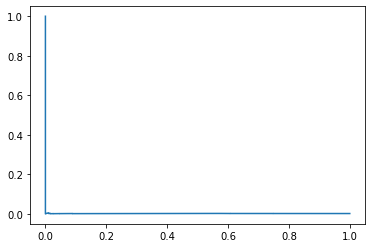

Air sous la courbe :  0.0020630552209682292


In [42]:
value, f1_score, precision, recall = evaluation(score, dfs["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)

### DIG

In [48]:
outliers_fraction = 0.01
clf = IsolationForest(contamination = 0.0023).fit(data_DIG)
predic_forest = clf.predict(data_DIG)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))
plt.show()

<Figure size 1440x1080 with 0 Axes>

In [49]:
clf.fit(data_DIG)
score = clf.decision_function(data_DIG)
score
set(score)

{0.17718263501149067,
 0.1523134389173606,
 0.21786580567686542,
 0.11398830621374145,
 0.14147905251985549,
 0.16448422258599749,
 0.1469968903166432,
 0.028574259200979668,
 0.11215586969490232,
 0.09245828659697963,
 0.24732239794603228,
 -0.004189572514309847,
 0.2196341203721684,
 0.19813401482920961,
 0.07030680967282532,
 0.1936330517006885,
 0.24502287311689142,
 0.18430827135589933,
 0.19615301572936367,
 0.12451340767558283,
 0.19325102292975277,
 0.10736912651593444,
 0.2250860383901228,
 0.15176281801134606,
 0.22808859231875245,
 0.23770613671230834,
 0.22811706042069413,
 0.16361280148356522,
 0.2125224483426667,
 0.039008162839071825,
 0.21307285158517691,
 0.15776690253305053,
 0.0785077624794619,
 0.20936597998738282,
 0.1900641065116338,
 0.18921958413693857,
 0.1947453879484382,
 0.20209950846133862,
 0.0725477817469814,
 0.11318037117613267,
 0.11464225077921719,
 0.15851391283664407,
 0.12929933116471792,
 0.11930669743493771,
 0.16571205892184215,
 0.1669652621524

<ipython-input-25-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


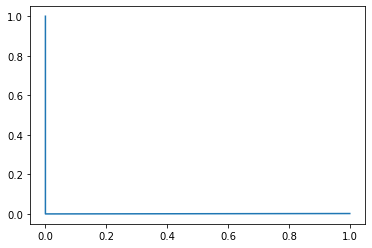

Air sous la courbe :  0.0011325269152203457


In [50]:
value, f1_score, precision, recall = evaluation(score, dfs["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)

### HB

In [51]:
outliers_fraction = 0.01
clf = IsolationForest(contamination = 0.0023).fit(data_HB)
predic_forest = clf.predict(data_HB)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))
plt.show()

<Figure size 1440x1080 with 0 Axes>

In [52]:
clf.fit(data_HB)
score = clf.decision_function(data_HB)
score
set(score)

{0.20170403549059301,
 0.10376296603806168,
 0.052752738374692854,
 0.13823864269909336,
 0.16582178365501932,
 0.22111449924693716,
 0.18360308339504172,
 0.1805839862928451,
 0.1798265386642015,
 0.07424997576219994,
 0.2010079823283049,
 0.14702018508330145,
 0.15189078110695914,
 0.1753635400038423,
 0.17911678932995195,
 0.17186895747399605,
 0.08951189222185485,
 0.14958674021337565,
 0.21292802215418766,
 0.20444695971355037,
 0.16087312501258572,
 0.15957587063348916,
 0.1282588812740642,
 0.20108185516835425,
 0.22006510731500845,
 0.1771372997086474,
 0.21736589997874495,
 0.19008048418129425,
 0.07112303714965951,
 0.18534763007919086,
 0.1575105884438932,
 0.2360505567326609,
 0.14059621592433524,
 0.2315919819208508,
 0.20503392430479345,
 0.18868225404920574,
 0.08976232728377487,
 0.09236671141829988,
 0.15009790413737478,
 0.16631397859869734,
 0.1756154624897322,
 0.16916636338555702,
 0.216818058596573,
 0.1191673527744116,
 0.17150232472204163,
 0.14856415519818722,


<ipython-input-25-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


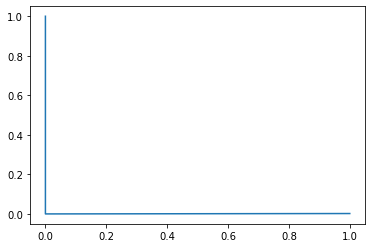

Air sous la courbe :  0.001229912540125877


In [53]:
value, f1_score, precision, recall = evaluation(score, dfs["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)

In [ ]:
pyod.models.abod.ABOD

In [ ]:
pyod.models.cblof.CBLOF

In [ ]:
pyod.models.cof.COF

In [ ]:
pyod.models.hbos.HBOS

In [ ]:
pyod.models.lof.LOF

In [ ]:
pyod.models.ocsvm.OCSVM

In [ ]:
pyod.models.pcs.PCA

In [ ]:
pyod.models.mcd.MCD

In [ ]:
pyod.models.sod.SOD

In [ ]:
pyod.models.sos.SOS

In [ ]:
pyod.models.xgbod.XGBOD

In [ ]:
pyod.models.rod.ROD

In [ ]:
pyod.models.loci.LOCI

In [ ]:
pyod.models.lmdd.LMDD

In [ ]:
pyod.models.fastABOD.FASTABOD